In [25]:
import sys
sys.path.append('..')
from Generators.Uniform_Generators.VanDerCorput import VanDerCorput
from Generators.Uniform_Generators.EcuyerCombined import EcuyerCombined
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

color_name_1 = 'midnightblue'  
color_1 = mcolors.CSS4_COLORS[color_name_1]
color_name_2 = 'mediumblue'
color_2 = mcolors.CSS4_COLORS[color_name_2]

In [26]:
bases = (7,11)
vdc_1 = VanDerCorput(bases[0])
vdc_2 = VanDerCorput(bases[1])
seeds_1 = (12345678, 98765432)
seeds_2 = (2345678, 8765432)

ecuyer_1 = EcuyerCombined(seeds_1)
ecuyer_2 = EcuyerCombined(seeds_2)

n_sim = 800

In [27]:
#### Geneate Quasi-Random numbers using Van Der Corput ####
x_1 = [vdc_1.generate() for _ in range(n_sim)]
y_1 = [vdc_2.generate() for _ in range(n_sim)]

In [28]:
#### Geneate Pseudo-Random numbers using LecuyerCombined ####
x_2 = [ecuyer_1.generate() for _ in range(n_sim)]
y_2 = [ecuyer_2.generate() for _ in range(n_sim)]


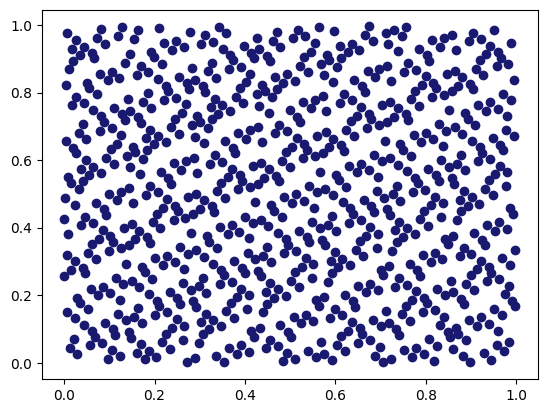

In [29]:
plt.scatter(x_1,y_1, color=color)
plt.show()


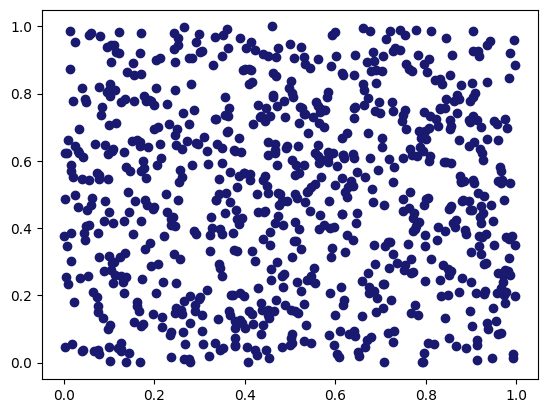

In [30]:
plt.scatter(x_2,y_2, color=color)
plt.show()

In [31]:
import seaborn as sns

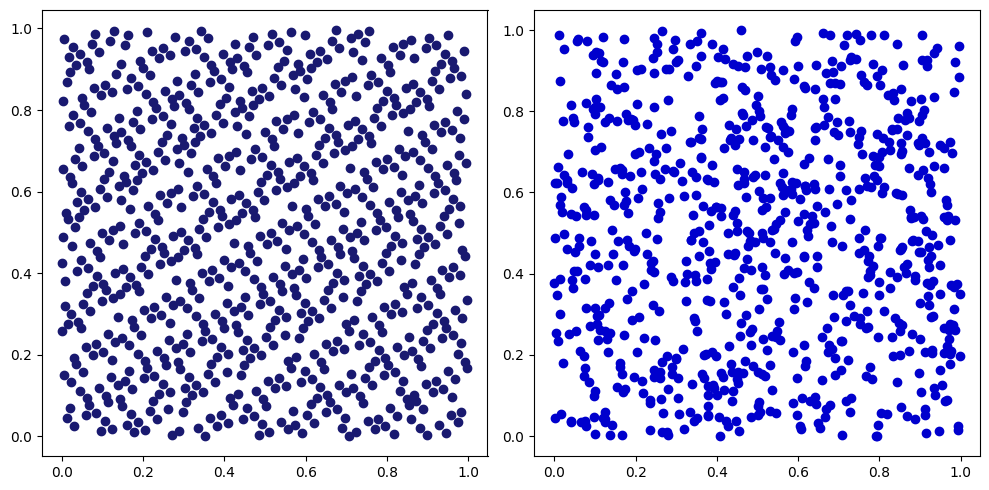

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Create the first scatter plot
axes[0].scatter(x_1, y_1, color=color_1, marker='o')
# Create the second scatter plot
axes[1].scatter(x_2, y_2, color=color_2, marker='o')
# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('/Users/romaincastellarnau/Desktop/MSc. 203/scatter_plots.png', dpi=300)
plt.show()